Import Libraries

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

1. Data Preprocessing:

In [20]:
# Load the dataset
data = pd.read_csv('/content/datasets_house_prices.csv')
print(data.head())

# Check and fill missing values
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

# Normalize features
scaler = MinMaxScaler()
features = ['Size (sqft)', 'Bedrooms', 'Age']
data[features] = scaler.fit_transform(data[features])

print(data.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64
   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)  \
0     0.992804      0.00  0.979798                       2.032719   
1     0.268773      1.00  0.888889                      23.695207   
2     0.404568      0.75  0.494949                       6.440232   
3     0.353254      0.25  0.282828                       8.129315   
4     0.342303   

2. Model Implementation:

In [21]:
# Set features (X) and target (y)
X = data[['Size (sqft)', 'Bedrooms', 'Age']].values
y = data['Price'].values

# Add bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Calculate model parameters (theta) using normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Show intercept and coefficients
intercept = theta[0]
coefficients = theta[1:]
print(f'Intercept: {intercept}, Coefficients: {coefficients}')

# Prediction function
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

Intercept: 230359.81519390657, Coefficients: [959690.20271217  19163.6461528  -20411.76938653]


3. Model Training:

In [22]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict and calculate MSE on training set
y_train_pred = predict(X_train, theta)
mse_train = np.mean((y_train_pred - y_train)**2)
print(f'Training MSE: {mse_train}')

Training MSE: 170450151.700481


4. Model Evaluation:

Testing MSE: 166330956.19491982


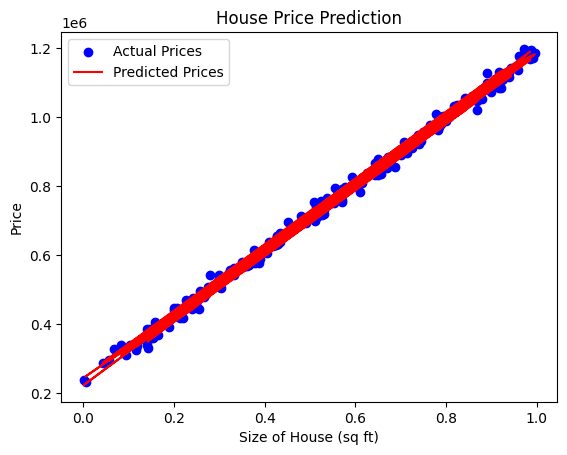

In [23]:
# Predict and calculate MSE on test set
y_test_pred = predict(X_test, theta)
mse_test = np.mean((y_test_pred - y_test)**2)
print(f'Testing MSE: {mse_test}')

# Plot actual vs predicted prices
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Prices')
plt.plot(X_test[:, 0], y_test_pred, color='red', label='Predicted Prices')
plt.xlabel('Size of House (sq ft)')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()